# Second Semester (2021 – 2022): ICS 483 - Computer Vision

## Assignment 01 (Due: February 09, 2022)
In this assignment, we will go through image representation and filtering using python.

One of the aims of this assignment is to apply the topics that have been covered in the class. In addition, to start getting comfortable searching for useful library functions online. So in many of the functions you will implement, you will have to look up helper functions.

### Enter Student Details
##### Name: "Abdulrhman Aljaber" , Student ID: "201650400"

### Task 0: Reprenseting Figures

In [3]:
#Matplotlib is a useful plotting library for python
import matplotlib.pyplot as plt
import cv2
import numpy as np
# This code is to make matplotlib figures appear inline in the notebook rather than in a new window.
%matplotlib inline

# set default size of plots
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In this part, you will load some images and do some operations on them. At the end of this part, please create a new python file `imageMain.py` and copy all of your implemented functions in that file to use them in your future assignments and project. In your submission, include this updated notebook, a PDF of this notebook, and imageMain.py.

## Question 1 (5 points)
Implement the readImage method and call the displayImage method implemented below. We will use these two methods through the rest of the notebook to visualize our work.

In [4]:
# Run this code to set the locations of the images we will be using. 
# You can change these paths to point to your own images if you want to try them out for fun.
image_path = './image1.jpg'

def displayImage(img, target = None):
    # Show image
    if target == 'RGB': 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
def readImage(imagePath):
    return cv2.imread(imagePath)
    

In [78]:
# import numpy as np
# image = readImage('image1.jpg')
# image2 = readImage('image2.jpg')
# displayImage(image)
# displayImage(image2)




## Question 2 (5 points)
Implement the convertColor method and convert the image into grayscale and binary.

In [3]:
def convertColor(image, srcColor, targetColor):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    if(targetColor == 'gray'):
        return gray 
    
    else:
        ret, BW = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
        ret, BWI = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
        color = {'grey':gray, 'BW':BWI, 'BWI':BWI}
        return BW,BWI

    

In [4]:
# convert image from RGB to greyscale
gray_img = convertColor(image, 'RGB', 'gray')
print("Below is the image with only one channel (gray) channel.")
displayImage(gray_img)

# convert image from RGB to binary
bw, bwi = convertColor(image, 'RGB', 'BW') # BWI: binary inverse
print("Below is the image with Black and white.")
displayImage(bw)
print("Below is the image with Black and white inversed.")
displayImage(bwi)

NameError: name 'image' is not defined

## Question 3 (10 points)
Implement the `rgb_exclusion()`, in which the input image is decomposed into the three channels: R, G and B and return the image excluding the specified channel. 

In [8]:
def rgb_exclusion(image, channelToExclude):
    img = image.copy() # image is not writeable, we can also cast the image while reading to np.array(image.open('path'))
    if channelToExclude == 'R':
        img[:,:,0] = 0
    elif channelToExclude == 'G':
        img[:,:,1] = 0
    elif channelToExclude == 'B':
        img[:,:,2] = 0
    return img

Below is the image without the red channel.


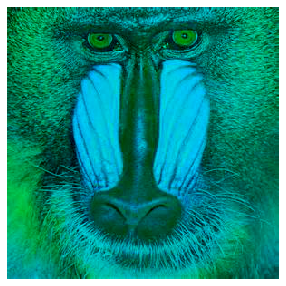

Below is the image without the green channel.


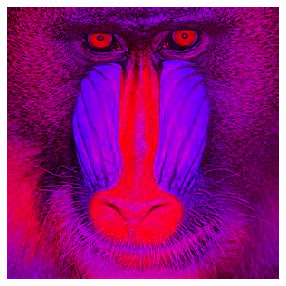

Below is the image without the blue channel.


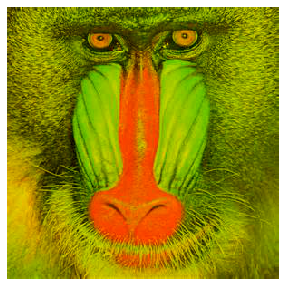

In [9]:
without_red = rgb_exclusion(image, 'R')
without_blue = rgb_exclusion(image, 'B')
without_green = rgb_exclusion(image, 'G')

print("Below is the image without the red channel.")
displayImage(without_red)

print("Below is the image without the green channel.")
displayImage(without_green)

print("Below is the image without the blue channel.")
displayImage(without_blue)

## Question 4 (10 points)
Implement the hsv_decomposition, in which the input image is decomposed into the three channels: H, S and V and return the values for the specified channel. 

In [10]:
def hsv_decomposition(image, channelToExclude):
    #First covert the image from RGB to HSV
    img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)/255
    # img = image.copy() # image is not writeable, we can also cast the image while reading to np.array(image.open('path'))
    decomposed = np.zeros(image.shape)
    if channelToExclude == 'H':
        decomposed[:,:,0] = img[:,:,0]
        return decomposed
    elif channelToExclude == 'S':
        decomposed[:,:,1] = img[:,:,1]
        return decomposed
    elif channelToExclude == 'V':
        decomposed[:,:,2] = img[:,:,2]
        return decomposed
    print('invalid channelToExclude input')

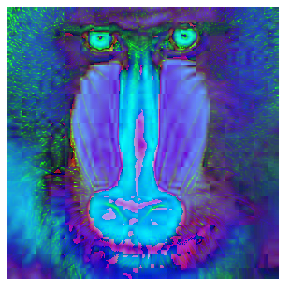

In [11]:
img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
displayImage(img_hsv)

Below is the image with only the H channel.


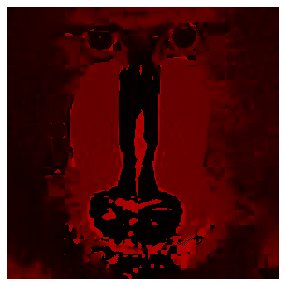

Below is the image with only the S channel.


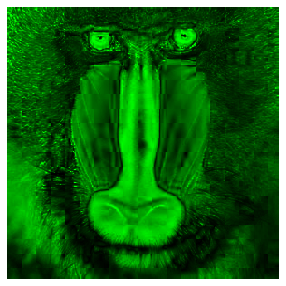

Below is the image with only the V channel.


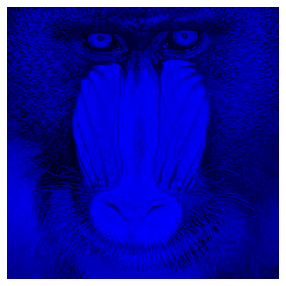

In [12]:
image_h = hsv_decomposition(image, 'H')
image_s = hsv_decomposition(image, 'S')
image_v = hsv_decomposition(image, 'V')

print("Below is the image with only the H channel.")
displayImage(image_h)

print("Below is the image with only the S channel.")
displayImage(image_s)

print("Below is the image with only the V channel.")
displayImage(image_v)

## Question 5 (5 points)
Explain in 2-3 sentences what happens to an image when you take away the H and S channels.
### Answer:
when we took only Hue the image end up to red, while when we took only S the image showed on green  

## Question 6 (20 points)
In this section, you will ransform the image into the frequency domain. In addition, you will compute and display the real, imaginary, magnitude and phase components of the transformed image.  

In [3]:
def fourier_tranformer(image):
    image = np.sqrt(image)/255.0
    gx = cv2.Sobel(np.float32(image), cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(np.float32(image), cv2.CV_32F, 0, 1)

    mag, ang = cv2.cartToPolar(gx, gy)

    return mag, ang, gx, gy
    return real, imaginary, magnitude, phase



In [14]:
def fourier_tranformer(image):
    image = convertColor(image, 'RGB', 'gray')
    imaginary = np.fft.fft2(image)
    
    imag_real = np.fft.fftshift(imaginary)
    magnitude = 20*np.log(np.abs(imag_real))
    phase = 20*np.angle(imag_real)
    return image, imaginary, magnitude, phase



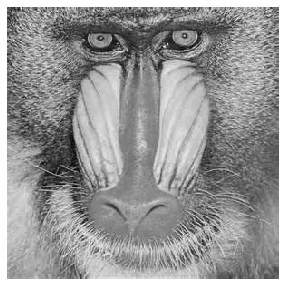

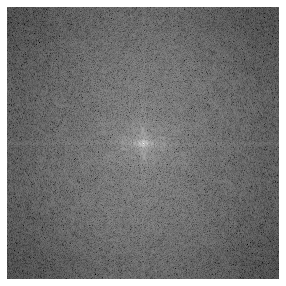

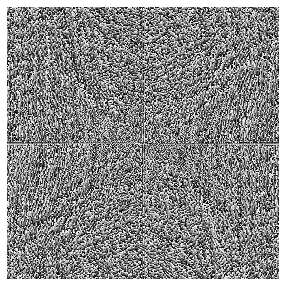

In [15]:
real, imaginary, magnitude, phase = fourier_tranformer(image)

displayImage(real)
# displayImage(imaginary)
displayImage(magnitude)
displayImage(phase)


## Question 7 (10 points)
(a) Add salt and pepper noise to the image. Generate two images of the input image by making the gray values of 5% and 10% of the image pixels randomly 0 (black) or 255 (white).


In [28]:
def add_saltpepper_noise(image,prob):
    
    img= image.copy()
    black = np.array([0, 0, 0], dtype='uint8')
    white = np.array([255, 255, 255], dtype='uint8')

    probs = np.random.random(image.shape[:2])
    img[probs < (prob / 2)] = black
    img[probs > 1 - (prob / 2)] = white
    return img


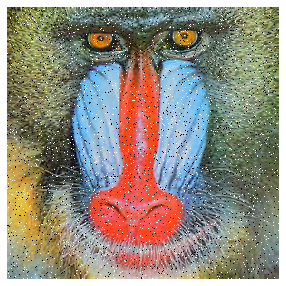

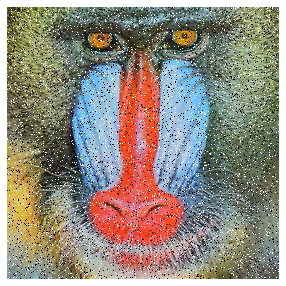

In [27]:
image_saltNoise_5 = add_saltpepper_noise(image,0.05)
displayImage(image_saltNoise_5)

image_saltNoise_10 = add_saltpepper_noise(image,0.1)
displayImage(image_saltNoise_10)

(b) Add Gaussian noise to the image. Use Gaussian noise with segma = 2 and 5 to get two noisy images.


In [38]:
def add_gaussian_noise(image, sigma):

    img = image.copy()/255.0
    img += np.random.normal(0, sigma, image.shape)
    return img


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


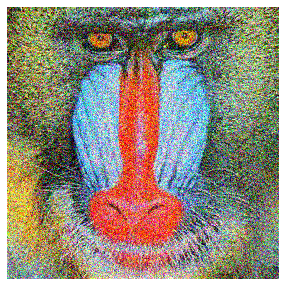

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


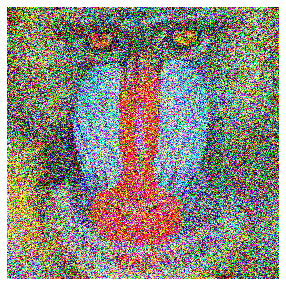

In [41]:
image_gaussianNoise_2 = add_gaussian_noise(image,0.2)
displayImage(image_gaussianNoise_2)

image_gaussianNoise_5 = add_gaussian_noise(image,0.5)
displayImage(image_gaussianNoise_5)


## Question 8 (15 points)
Apply average, Gaussian, and median filters of 3 x 3 and 5 x 5 sizes to the images of question 7 (a) and 7 (b) and analyze the resul

In [42]:
def add_filters(image, filterType,filterSzie):
    filters = {'gaussian':cv2.GaussianBlur(image,(filterSzie,filterSzie),0),
                'median':cv2.medianBlur(image,filterSzie),
                'average':cv2.blur(image,(filterSzie,filterSzie)),
    }
    return filters.get(filterType)



Below is the image with a 3*3 Gaussian filter.


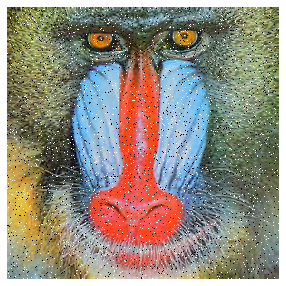

Below is the image with a 5*5 Gaussian  filter.


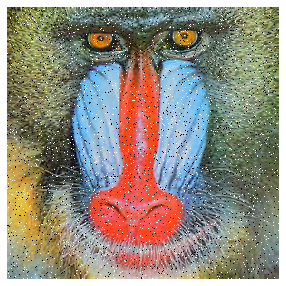

Below is the image with a 3*3 median filter.


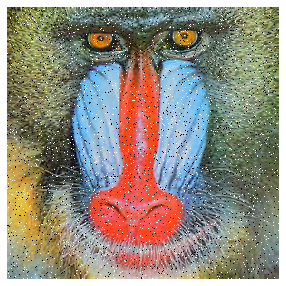

Below is the image with a 5*5 median filter.


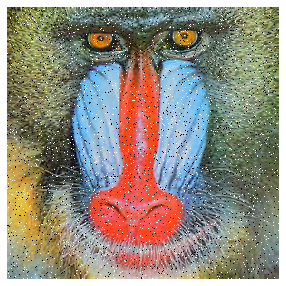

Below is the image with a 3*3 average filter.


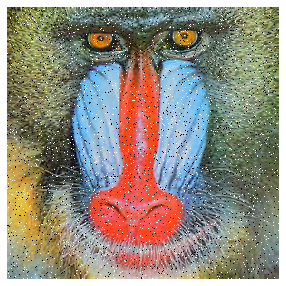

Below is the image with a 5*5 average filter.


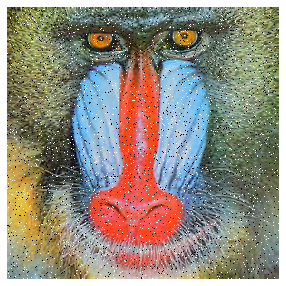

In [45]:
image_gaussianFilter_3 = add_filters(image,'gaussian',3)
print("Below is the image with a 3*3 Gaussian filter.")
displayImage(image_saltNoise_5)


image_gaussianFilter_5 = add_filters(image,'gaussian',5)
print("Below is the image with a 5*5 Gaussian  filter.")
displayImage(image_saltNoise_5)


image_medianFilter_3 = add_filters(image,'median',3)
print("Below is the image with a 3*3 median filter.")
displayImage(image_saltNoise_5)


image_MedianFilter_3 = add_filters(image,'median',5)
print("Below is the image with a 5*5 median filter.")
displayImage(image_saltNoise_5)


image_AverageFilter_3 = add_filters(image,'average',3)
print("Below is the image with a 3*3 average filter.")
displayImage(image_saltNoise_5)


image_AverageFilter_3 = add_filters(image,'average',5)
print("Below is the image with a 5*5 average filter.")
displayImage(image_saltNoise_5)


## Question 9 (20 points)
Enhance image2 to increase the brightness of bright regions and increase the darkness of other regions, then display the enhanced image.

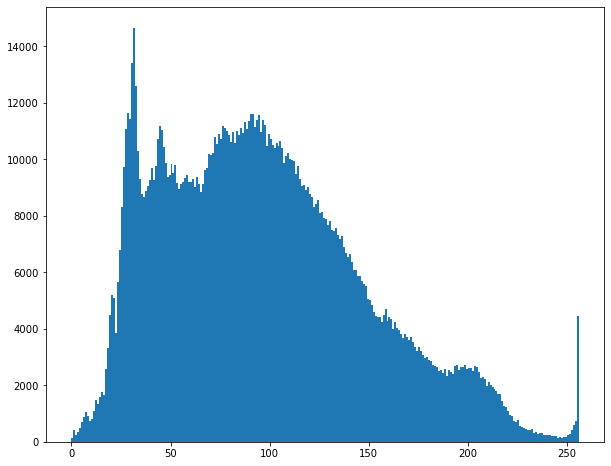

In [82]:
plt.hist(image2.ravel(),256,[0,256]); plt.show()

# Assignment 2


## Question 1 (20 points)
Apply Sobel operators to find the edges of the “hand.jpg “ image. 

1. Find and show the horizontal and vertical gradients of the image
2. Find and show the gradient magnitude
3. Find and show the gradient directions
4. Analyze the results.


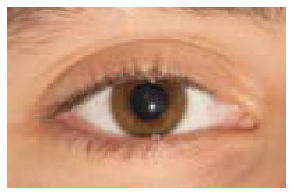

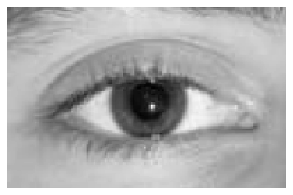

In [135]:
def Sobel(imagePath):
    eyesImg = readImage(imagePath)
    grayEye = cv2.cvtColor(eyesImg, cv2.COLOR_BGR2GRAY)
    print('RGB Image')
    displayImage(eyesImg,'RGB')
    print("Gray Image")
    displayImage(grayEye)
    k =3
    gray_blur = cv2.bilateralFilter(grayEye, k, k * 2, k / 2) 

    fx = np.array([[ -1, 0, 1], 
                        [ -2, 0, 2], 
                        [ -1, 0, 1]])
    fy = np.array([[ -1, -2, -1], 
                        [  0,  0,  0], 
                        [  1,  2,  1]])
                        
    Dx = cv2.filter2D(gray_blur, cv2.CV_32F, fx)  
    Dy = cv2.filter2D(gray_blur, cv2.CV_32F, fy)

    print('Drivative of x')
    displayImage(Dx)
    print('Drivative of y')
    displayImage(Dy)

    magnitude = cv2.magnitude(Dx, Dy)
    directions = cv2.phase(Dx, Dy, angleInDegrees=True)
    directions = directions / 2. 
    hsv = np.zeros_like(eyesImg)
    hsv[..., 0] = directions 
    hsv[..., 1] = 255 
    hsv[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX) 
    colorspace = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    print('gradient magnitude')
    displayImage(magnitude)
    print('gradient directions')
    displayImage(directions)
    print('gradient magnitude with a colored edges')
    displayImage(colorspace,'RGB')


RGB Image


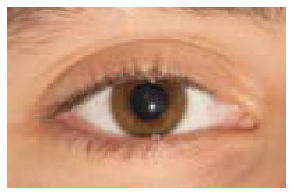

Gray Image


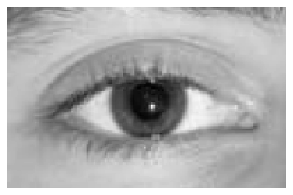

Drivative of x


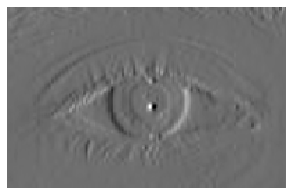

Drivative of y


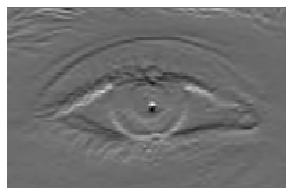

gradient magnitude


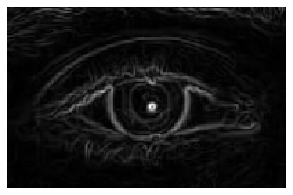

gradient directions


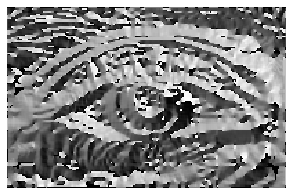

gradient magnitude with a colored edges


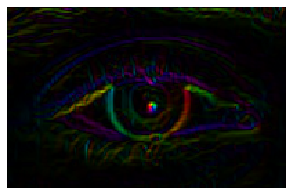

In [136]:
Sobel('eye01.PNG')

as we can see above, we were able to find the virtical edges by takking  the Derivative of x and the horizental edge by takign the Derivative of y. Moreover we found the magnitude by applying the the following formula sqrt(dx**2+dy**2) and we displayed it with and without colorspace, and we used for HSV colors to do that hence it works better with edges. Finally we obtained the dicrctions by applying the arctan formula.  

## Question 2 (20 points)
Apply Canny detector to “hand.jpg” image and compare the results with Sobel operator.

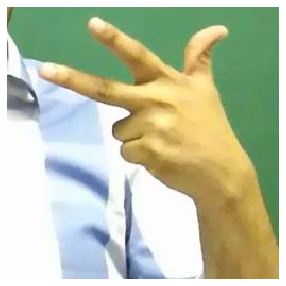

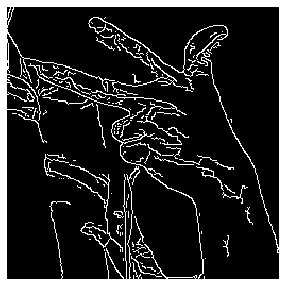

In [130]:
def Canny(imagepath):
    handimg = readImage(imagepath)
    grayhand = cv2.cvtColor(handimg, cv2.COLOR_BGR2GRAY)
    p1 = 71
    p2 = p1*0.4
    edges = cv2.Canny(image=grayhand, threshold1=p1, threshold2=p2) # Canny Edge Detection
    displayImage(handimg,'RGB')
    displayImage(edges)

Canny('hand.jpg')

## Question 3 (30 points)
Apply Hough transform to detect the center and radius of all eye irises found in 'eyes.zip' images. You need also to display and draw the detected irises on the original images.

In [128]:
    def eyeIrisDetector(imagePath):
        eyesImg = readImage(imagePath)
        grayEye = cv2.cvtColor(eyesImg, cv2.COLOR_BGR2GRAY)
        if 'eye01.png'== imagePath:
            p1 = 72
            p2 = p1*0.4
        elif 'eye02.png'== imagePath:
            p1 = 66
            p2 = p1*0.4
        else:
            p1 = 71
            p2 = p1*0.4
        cimg = np.copy(eyesImg)
        circles = cv2.HoughCircles(grayEye, cv2.HOUGH_GRADIENT, 1, cimg.shape[0]/64, param1=p1, param2=p2, minRadius=25, maxRadius=50)


        if circles is not None:
            cir_len = circles.shape[1] 
            circles = np.uint16(np.around(circles))
            for i in circles[0, :]:
                # Draw the outer circle
                cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
                # Draw the center of the circle
                cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
        else:
            cir_len = 0 
            
        edges = cv2.Canny(grayEye, p1, p2)
        displayImage(edges)
        displayImage(cimg,'RGB')
        


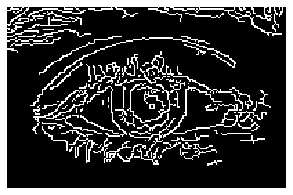

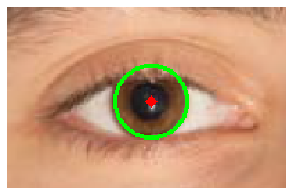

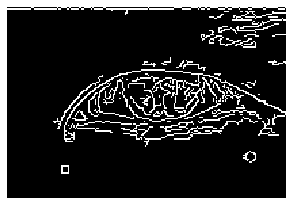

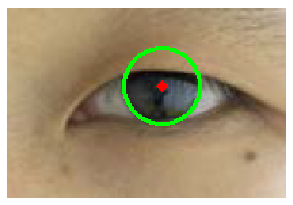

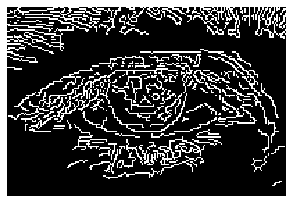

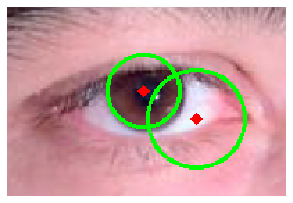

In [129]:

    eyeIrisDetector('eye01.png')
    eyeIrisDetector('eye02.png')
    eyeIrisDetector('eye03.png')



# Assignment 3 
In this assignment, you will be implementing detectors, descriptors, and image segmentation using python.

One of the aims of this assignment is to apply the topics that have been covered in the class. In addition, to start getting comfortable searching for useful library functions online. So in many of the functions you will implement, you will have to look up helper functions.

## Question 01 [Detector] [30 points]
In this part, you will implement a Harris detector to detect keypoints as follows:

1. Create a python function harris_detector that gets an image as input and returns the response (R) which is computed as follows:
    
    (a) Compute the structure tensor matrix (M)


        You can use a Gaussian window W of size 3x3.
     
    (b) For each pixel, compute the corner response R=Det(M)-k(Trace(M)2)


2. Pass image1.png to harris_detector function and display the detected corners on this image.

3. Use the corner_peaks method in skimage.feature to find peaks in the corner measure response image (R).

In [79]:
# def harris_detector(image):

#     gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#     gray = np.float32(gray)

#     dst = cv2.cornerHarris(gray,2,3,0.04)
#     #result is dilated for marking the corners, not important
#     dst = cv2.dilate(dst,None)
#     # Threshold for an optimal value, it may vary depending on the image.
#     image[dst>0.01*dst.max()]=[0,0,255]
#     return image
# image = readImage('image1.jpg')
# Rimage = harris_detector(image)
# cv2.imshow('dst',image)
# if cv2.waitKey(0) & 0xff == 27:
#     cv2.destroyAllWindows()


Text(0.5, 1.0, 'Harris Corner Response')

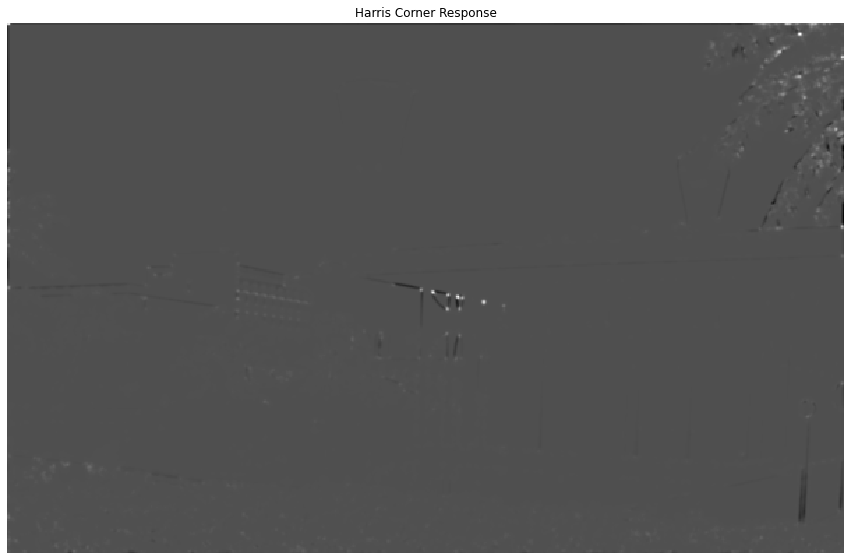

In [205]:
from skimage.feature import corner_harris, corner_peaks
from skimage.io import imread
# image1 = imread('uttower1.jpg', as_gray=True)
image1 = imread('image1.jpg', as_gray=True)

def harris_detector(image):


    return corner_harris(image1)

response = harris_detector(image1)

plt.subplots(figsize=(15,15))
plt.imshow(response)
plt.axis('off')
plt.title('Harris Corner Response')


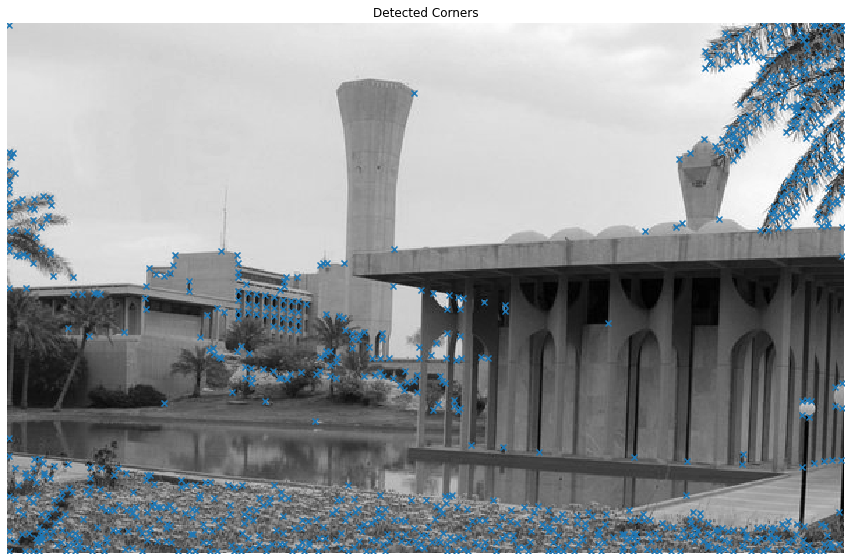

In [206]:
corners = corner_peaks(response, threshold_rel=0.01)
plt.subplots(figsize=(15,15))
plt.imshow(image1)
plt.scatter(corners[:,1], corners[:,0], marker='x')
plt.axis('off')
plt.title('Detected Corners')
plt.show()

## Question 02 [Descriptor] [20 points]

1. After keypoints detection, you will implement your simple descriptor to describe each keypoint to be used for matching. Implement the simple descriptor that is mentioned in the slides:

    (a) Create a simple_descriptor function that takes the keypoints detected in question 01 and returns the descriptors of these keypoints.
    
    (b)	Match the descriptors in image1 to those in image2 and show them as a line from keypoint in image1 to the corresponding keypoint in image2.


In [150]:
from scipy.spatial.distance import cdist

def simple_descriptor(patch):
    feature = []
    
    std = np.std(patch)
    mean = np.mean(patch)
    if std > 0.0:
        feature = (patch - mean) / std
    else:
        feature = patch - mean
    feature = feature.reshape(-1)
    return feature

def describe_keypoints(image, keypoints, desc_func, patch_size=16):

    image.astype(np.float32)
    desc = []

    for i, kp in enumerate(keypoints):
        y, x = kp
        patch = image[y - (patch_size // 2):y + ((patch_size + 1) // 2),
                      x - (patch_size // 2):x + ((patch_size + 1) // 2)]
        desc.append(desc_func(patch))
    return np.array(desc)

def match_descriptors(desc1, desc2, threshold=0.5):

    matches = []
    
    N = desc1.shape[0]
    dists = cdist(desc1, desc2)


    for i in range(N):
        dist = dists[i, :]
        if np.min(dist) / (np.partition(dist, 2)[1]) <= threshold:
            matches.append([i, np.argmin(dist)])
    matches = np.array(matches).reshape(-1, 2)

    
    return matches
def plot_matches(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):


    image1.astype(np.float32)
    image2.astype(np.float32)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
'-', color=color)


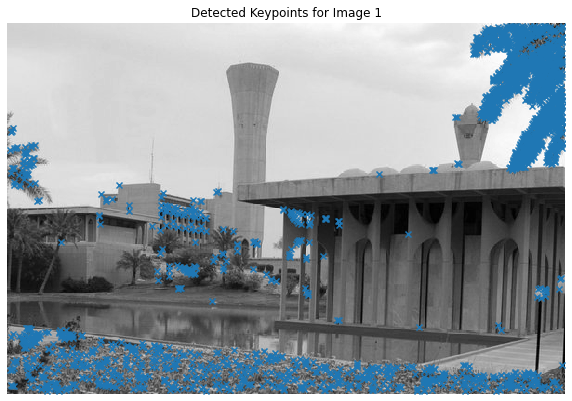

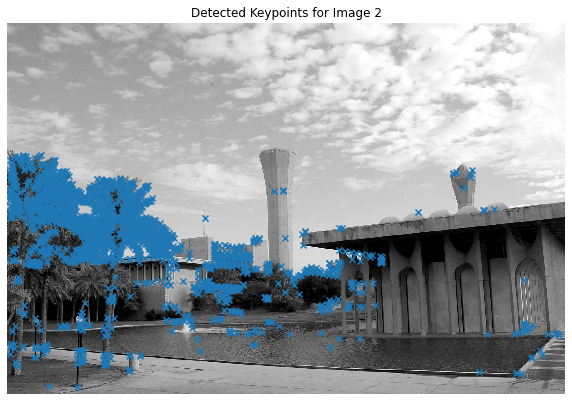

In [177]:
from skimage import data
from skimage.transform import resize

image1 = imread('image1.jpg', as_gray=True)

image1 = resize(image1, (1196, 1800), order=0, preserve_range=True)
image2 = imread('image2.jpg', as_gray=True)

keypoints1 = corner_peaks(corner_harris(image1),
                          threshold_rel=0.01,
                          exclude_border=8)
keypoints2 = corner_peaks(corner_harris(image2),
                          threshold_rel=0.01,
                          exclude_border=8)



plt.subplots(figsize=(10,10))
plt.imshow(image1)
plt.scatter(keypoints1[:,1], keypoints1[:,0], marker='x')
plt.axis('off')
plt.title('Detected Keypoints for Image 1')

plt.subplots(figsize=(10,10))
plt.imshow(image2)
plt.scatter(keypoints2[:,1], keypoints2[:,0], marker='x')
plt.axis('off')
plt.title('Detected Keypoints for Image 2')
plt.show()


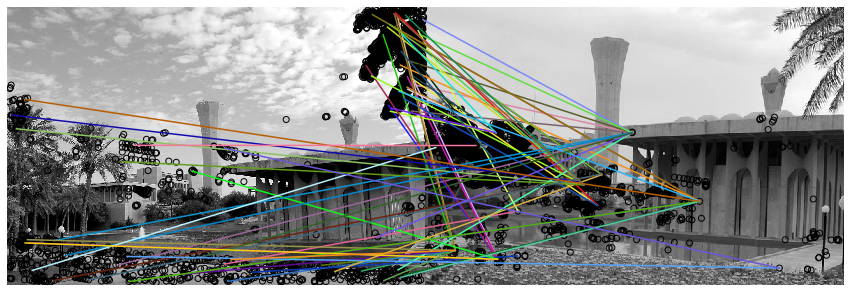

In [184]:
patch_size = 5

# Extract features from the corners
desc1 = describe_keypoints(image1, keypoints1,
                           desc_func=simple_descriptor,
                           patch_size=patch_size)
desc2 = describe_keypoints(image2, keypoints2,
                           desc_func=simple_descriptor,
                           patch_size=patch_size)

# Match descriptors in image1 to those in image2
matches = match_descriptors(desc1, desc2, 0.7)

# Plot matches

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.axis('off')
plot_matches(ax, image2, image1, keypoints1, keypoints2, matches)
plt.show()


## Question 03 [SIFT] [20 points]

Use SIFT for matching the keypoints between image1 and image2. Please follow these steps:

1. Detect keypoints.

2. Describe detected keypoints.

3. Perform matching between keypoints descriptors using KNN and keep only matches with small distances.

4. Draw the matched keypoints.


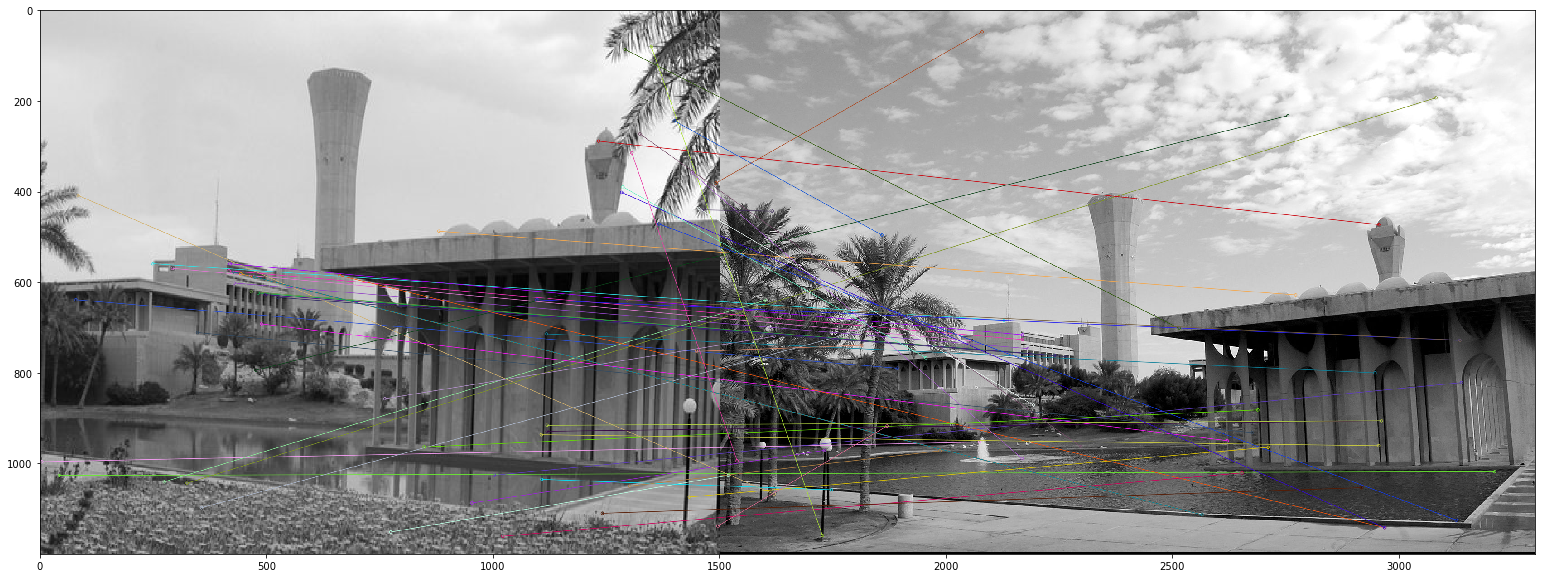

(1196, 1800)


In [195]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
image1 = cv.imread('image1.jpg',cv.IMREAD_GRAYSCALE)
image1 = cv2.resize(image1, (1500, 1200), interpolation = cv2.INTER_AREA)
image2 = cv.imread('image2.jpg',cv.IMREAD_GRAYSCALE) 

# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(image1,None)
kp2, des2 = sift.detectAndCompute(image2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(image1,kp1,image2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.subplots(figsize=(30, 10))
plt.imshow(img3),plt.show()
print(image2.shape)

## Question 04 [Segmentation] [30 points]

1. Use K-means clustering for clustering road.jpg and Office-4.jpg images. Use a different number of clusters until you reach a reasonable solution. Analyze the results of applying the different cluster numbers?


2. Use mean-shift clustering for clustering road.jpg and Office-4.jpg images. Use different window sizes. Analyze the results of applying different window sizes? Compare results with k-means?

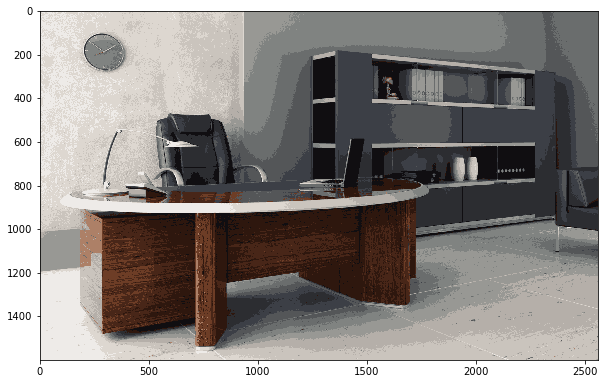

In [203]:
image = cv2.imread("Office-4.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 15
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

In [204]:
import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth


# filter to reduce noise
img = cv.medianBlur(image, 3)

# flatten the image
flat_image = img.reshape((-1,3))
flat_image = np.float32(flat_image)

# meanshift
bandwidth = estimate_bandwidth(flat_image, quantile=.06, n_samples=3000)
ms = MeanShift(bandwidth, max_iter=800, bin_seeding=True)
ms.fit(flat_image)
labeled=ms.labels_


# get number of segments
segments = np.unique(labeled)
print('Number of segments: ', segments.shape[0])

# get the average color of each segment
total = np.zeros((segments.shape[0], 3), dtype=float)
count = np.zeros(total.shape, dtype=float)
for i, label in enumerate(labeled):
    total[label] = total[label] + flat_image[i]
    count[label] += 1
avg = total/count
avg = np.uint8(avg)

# cast the labeled image into the corresponding average color
res = avg[labeled]
result = res.reshape((img.shape))

# show the result
cv.imshow('result',result)
cv.waitKey(0)
cv.destroyAllWindows()

C:\Users\0xboja\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass bandwidth=19.365154383222205 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Number of segments:  8
